### Do linear regression for upper ocean ALK as a function of GCB CaCO3 flux across 27.4 isopycnal

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np
import esmlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
import seawater as sw
from seawater.library import T90conv
from scipy import stats
import pop_tools 

Cannot write to data cache folder '/glade/p/cesmdata/cseg'. Will not be able to download remote data files. Use environment variable 'CESMDATAROOT' to specify another directory.


### Take x and y values from emergent constraints notebook

In [3]:
CaCO3_fluxes = [0, 3.21, 12.91, 16.71, 25.82]

In [4]:
ALKs = [2388.82, 2382.22, 2368.12, 2361.73, 2347.41]

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(CaCO3_fluxes,ALKs)

In [6]:
slope

-1.5786674398637732

In [7]:
intercept

2388.1777690696017

In [14]:
model_alk = np.empty([27])
for flux in np.arange(0,27,1):
    #print(flux)
    model_alk[flux] = slope * flux + intercept

In [15]:
model_alk

array([2388.17776907, 2386.59910163, 2385.02043419, 2383.44176675,
       2381.86309931, 2380.28443187, 2378.70576443, 2377.12709699,
       2375.54842955, 2373.96976211, 2372.39109467, 2370.81242723,
       2369.23375979, 2367.65509235, 2366.07642491, 2364.49775747,
       2362.91909003, 2361.34042259, 2359.76175515, 2358.18308771,
       2356.60442027, 2355.02575283, 2353.44708539, 2351.86841795,
       2350.28975051, 2348.71108307, 2347.13241563])

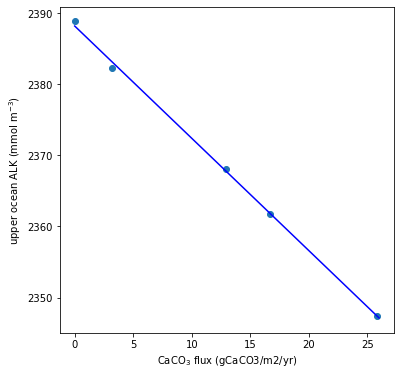

In [19]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(0,27,1),model_alk,color='blue') # , label='control GCB CaCO$_3$ flux')
ax.set(xlabel='CaCO$_3$ flux (gCaCO3/m2/yr)',ylabel='upper ocean ALK (mmol m$^{-3}$)')
ax.scatter(CaCO3_fluxes,ALKs,marker='o');
#ax.legend()
